![Screen%20Shot%202022-05-23%20at%204.46.33%20PM.png]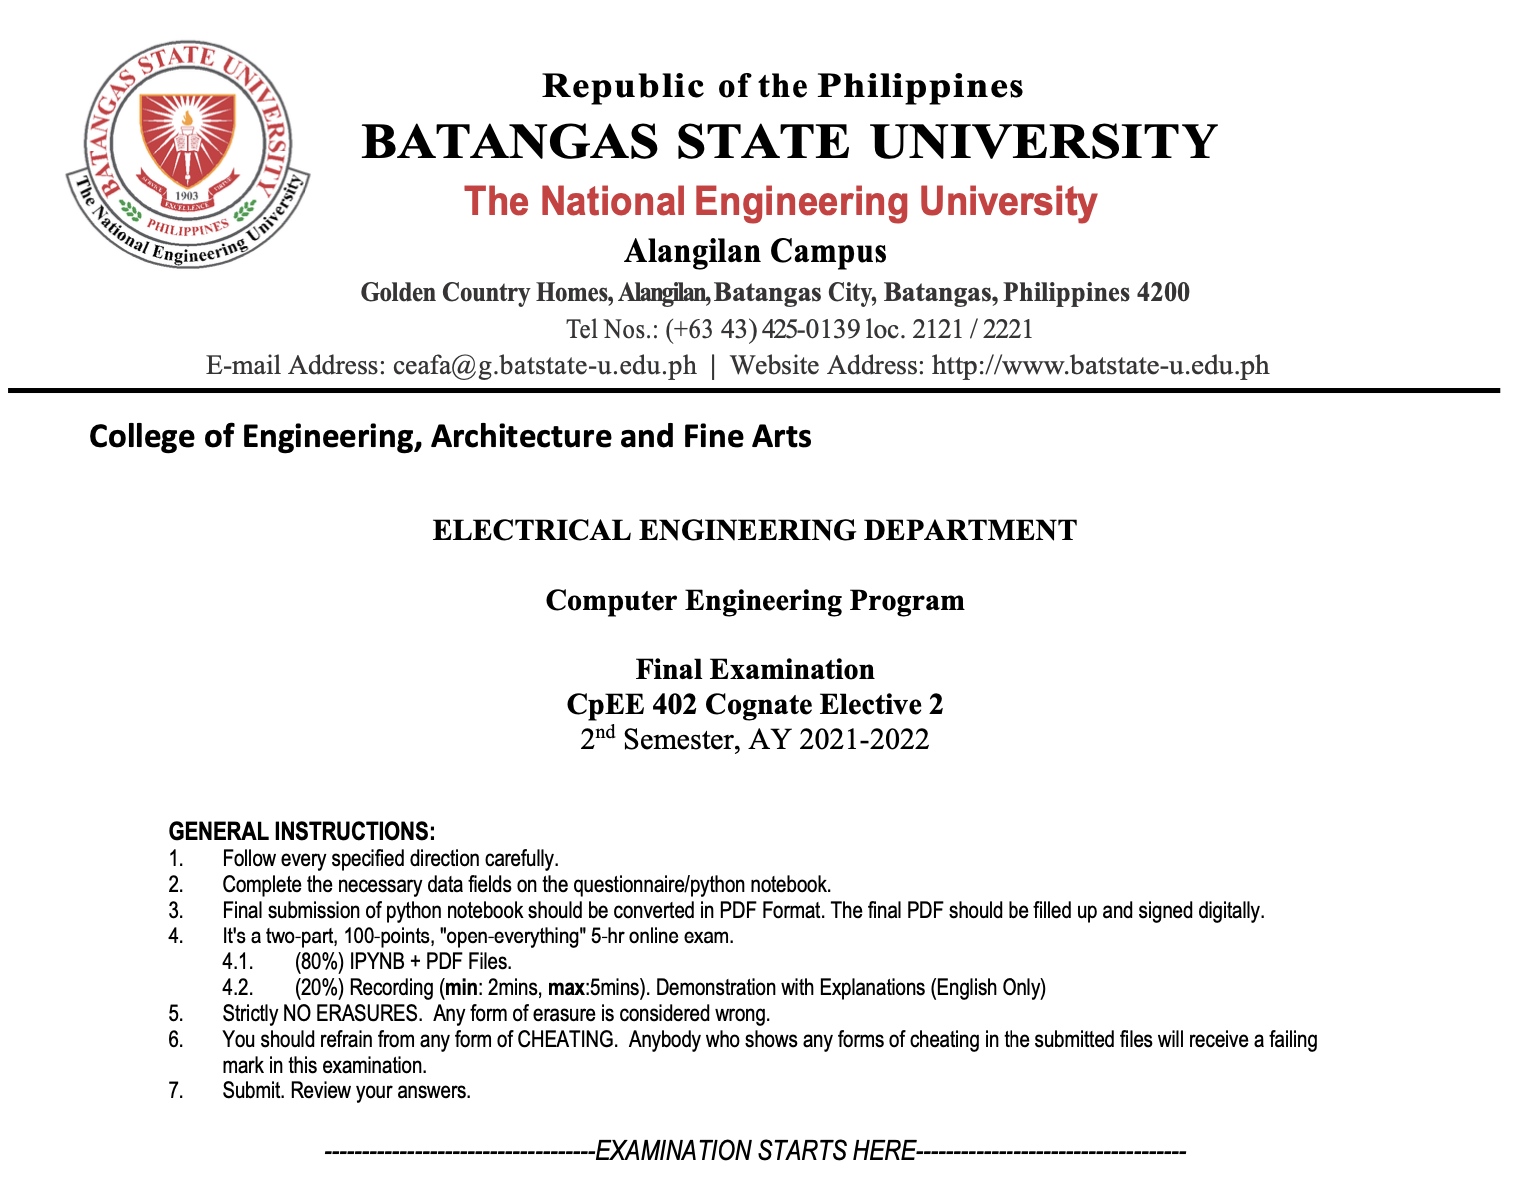

## I. PROBLEM STATEMENT (5 Points)

Define and Explain the regression problem you want to solve. (Min of 100, Max of 300 Words)

  Nowadays, e-commerce has played a big role in providing customers needs over the internet which results to the usage of online payment especially credit cards. This type of payment is usually prone to so called Credit Card Fraud which is form of identity theft that involves an unauthorized taking of another’s credit card information for the purpose of charging purchases to the account or removing funds from it. Credit card fraud detection is one way to determine in which the transaction attempt is legit on not. It is a process of identifying purchase attempts that are fraudulent and rejecting them rather than processing the order. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## II. DATASET DESCRIPTION (5 Points)

Look for Public Datasets. Define and Explain the dataset you will use for classification-ensemble problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data (5 Points)

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data = pd.read_csv('creditcarddset.csv')


### 2. Get an overview of the dataset: (5 Points)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 3. Print the first five and last five rows of the dataset (5 Points)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 4. Find the summary statistics of the dataset (5 Points)

In [ ]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages. (5 Points)

In [ ]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data



,count_missing,perc_missing
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap. (5 Points)

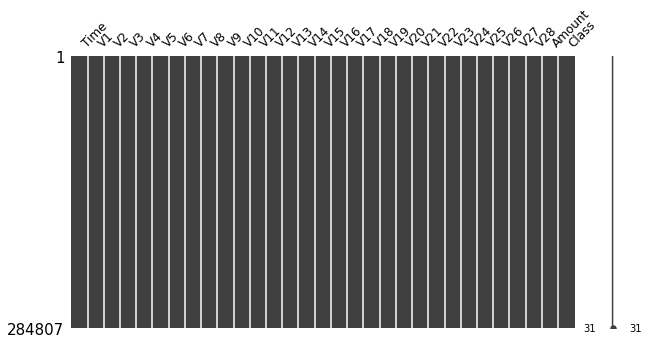

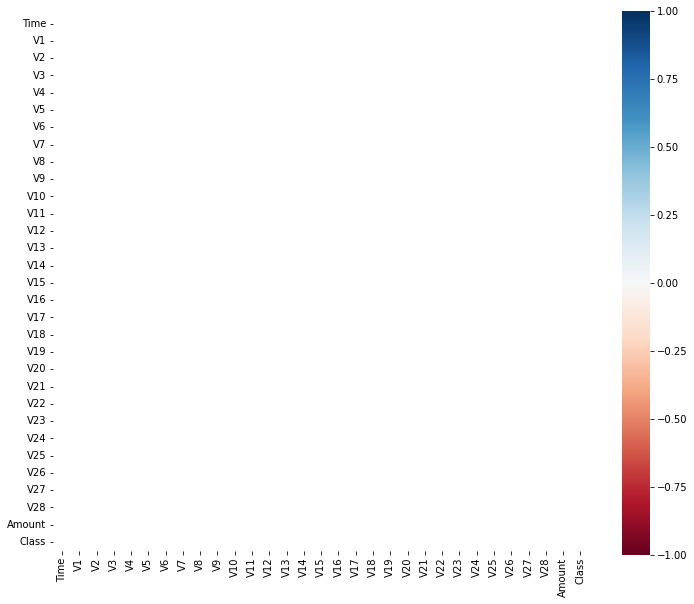

In [ ]:
msno.matrix(data,figsize=(10,5), fontsize=12)
plt.figure(figsize = (12,10))



sns.heatmap(data.isnull().corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

### 7. Delete the columns having more than 80% of values missing. (5 Points)

In [ ]:
##NA



### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation (5 Points)

In [ ]:
## Since no value is missing, imputation is unnecessary. However, the dataset is highly unbalanced.
## Therefore, the student perform the following code in order to produce a balance data set.



In [ ]:
cb = data['Class'].value_counts()


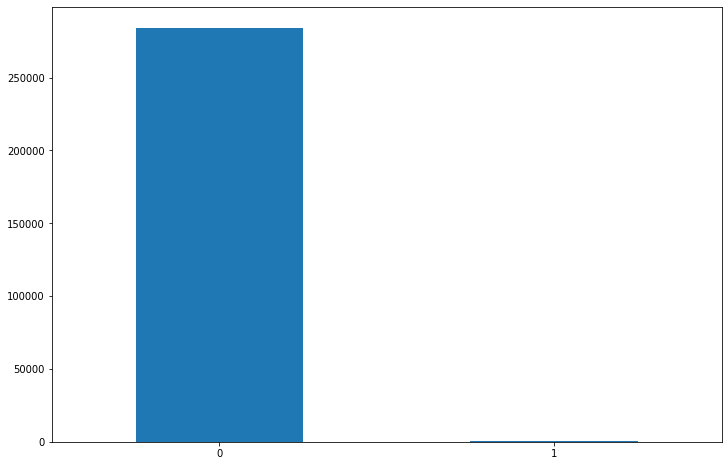

In [ ]:
br = cb.plot.bar(rot=0, figsize=(12,8))

In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_data= pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
new_data.shape

(984, 31)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92662,64035.0,-0.763027,-0.653410,0.422189,-1.466773,-0.953299,0.056121,-0.715643,-2.622038,0.854514,...,-1.023069,0.454281,-0.451954,0.019439,0.828789,-0.776247,0.068709,0.295196,326.57,0
253314,156193.0,2.088587,-0.633029,-0.969221,-0.633645,-0.820094,-0.833331,-0.914856,-0.088862,-0.344033,...,0.308207,0.993322,0.091705,0.005188,-0.160988,-0.116375,0.031448,-0.018420,19.00,0
90380,62996.0,-4.421725,-1.495091,-0.742253,-2.499586,-1.807511,-2.150940,-0.302130,0.877621,-0.761324,...,-0.265813,-1.096781,-0.994729,0.783362,0.261917,-0.393078,-1.153960,-0.556225,81.20,0
36921,38732.0,1.099031,0.033799,0.254649,1.226453,-0.006648,0.319729,-0.047034,0.176426,0.134597,...,-0.063666,-0.060695,-0.129587,-0.314047,0.649194,-0.309985,0.027688,0.005310,31.84,0
217731,141006.0,-1.095060,1.910541,-2.062814,-1.365807,1.031849,-1.013276,1.093535,0.027999,0.390310,...,0.109418,0.364958,-0.211710,0.050560,0.535022,0.174245,-0.039262,0.170405,3.85,0


In [ ]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,984.0,89973.766260,48099.168447,145.000000,49485.000000,84204.000000,136245.250000,172759.000000
V1,984.0,-2.391816,5.539035,-30.552380,-2.800824,-0.818034,0.986970,2.373130
V2,984.0,1.800369,3.676627,-14.981971,-0.275107,0.957112,2.791569,22.057729
V3,984.0,-3.494337,6.229285,-31.103685,-5.113334,-1.345531,0.393825,3.225559
V4,984.0,2.229074,3.240560,-3.672999,-0.223251,1.254823,4.276079,12.114672
V5,984.0,-1.617928,4.200922,-22.105532,-1.873814,-0.473862,0.481652,11.095089
V6,984.0,-0.680505,1.769190,-6.406267,-1.576412,-0.643216,0.084094,7.758075
V7,984.0,-2.766617,5.866336,-43.557242,-3.060742,-0.686928,0.273693,10.810261
V8,984.0,0.284643,4.884753,-41.044261,-0.202834,0.160871,0.880100,20.007208
V9,984.0,-1.309346,2.301300,-13.434066,-2.298358,-0.721154,0.148993,5.358971


### 9. Export the Cleaned Dataset. (5 Points)

In [ ]:
new_data.to_csv('cleaned_creditcarddset.csv')





## IV.  AI MODELLING

#### IF REGRESSION: Use Applied Regression Analysis (ACA) using ENSEMBLE
#### IF CLASSIFICATION: Use Applied Classification Analysis (ACA) using ENSEMBLE

### 1. Import the required dependencies. (5 Points)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score)
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 2. Read the cleaned data. (5 Points)

In [ ]:
df = pd.read_csv('cleaned_creditcarddset.csv')

### 3. Divide the dataset into train and validation DataFrames. (5 Points)



In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

print("x_train: ", X_train.shape)
print("x_val: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_val: ", y_test.shape)

x_train:  (787, 31)
x_val:  (197, 31)
y_train:  (787,)
y_val:  (197,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers/regressor and 1 stacked model. (10 Points)

NOTE:
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques.
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

KNN

In [ ]:
params_knn = {
    "leaf_size": list(range(1,30)),
    "n_neighbors": list(range(1,50)),
    "p": [1,2]
}


grid_search_kn = GridSearchCV(KNeighborsClassifier(), params_knn, verbose=1, cv=5)
grid_search_kn.fit(X_train, y_train);
print ("Best Score: ", grid_search_kn.best_score_)
print ("Best Parameters: ", grid_search_kn.best_params_)
print ("Best Estimator: ", grid_search_kn.best_estimator_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
Best Score:  0.9390389421914055
Best Parameters:  {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
Best Estimator:  KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)


Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 100)
param_dict = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}
grid_dt = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
print ("Best Score: ", grid_dt.best_score_)
print ("Best Parameters: ", grid_dt.best_params_)
print ("Best Estimator: ", grid_dt.best_estimator_)

Best Score:  0.9352253487059581
Best Parameters:  {'max_leaf_nodes': 7, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(max_leaf_nodes=7, random_state=100)


Model Training

In [ ]:
## KNeighbors training
kneighbors_params = {
    'leaf_size': 1,
    'n_neighbors': 3,
    'p': 1
}
knn = KNeighborsClassifier(**kneighbors_params)
knn.fit(X_train, y_train)

## Decision Tree training
decisiontree_params = {
    'max_leaf_nodes': 7,
    'min_samples_split': 2
}
dt = DecisionTreeClassifier(**decisiontree_params, random_state = 11)
dt.fit(X_train, y_train)

## Stacked model training
estimator_list = [
    ('knn', knn),
    ('dt', dt),
     ]
stacked_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())
stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(leaf_size=1, n_neighbors=3,
                                                     p=1)),
                               ('dt',
                                DecisionTreeClassifier(max_leaf_nodes=7,
                                                       random_state=11))],
                   final_estimator=LogisticRegression())

### 5. Calculate the performance and use a metric accordingly (Target Score >= 90%): (5 Points)

In [ ]:
## For knn
knnpred_val = knn.predict(X_train)
accuracyscore = accuracy_score(y_train, knnpred_val)
precisionscore = precision_score(y_train, knnpred_val)
recallscore = recall_score(y_train, knnpred_val)
f1score = f1_score(y_train, knnpred_val)
cm_rf = confusion_matrix(y_train, knnpred_val)

## For dt
dtpred_val = dt.predict(X_train)
accuracyscore_dt = accuracy_score(y_train, dtpred_val)
precisionscore_dt = precision_score(y_train, dtpred_val)
recallscore_dt = recall_score(y_train, dtpred_val)
f1score_dt = f1_score(y_train, dtpred_val)
cm_rf_dt = confusion_matrix(y_train, dtpred_val)

## For Stack
stacked_preds_val = stacked_model.predict(X_train)
accuracyscore_st = accuracy_score(y_train, stacked_preds_val)
precisionscore_st = precision_score(y_train, stacked_preds_val)
recallscore_st = recall_score(y_train, stacked_preds_val)
f1score_st = f1_score(y_train, stacked_preds_val)
cm_rf2 = confusion_matrix(y_train, stacked_preds_val)

performance_knn = pd.DataFrame(
    {"Accuracy": accuracyscore, "Recall": recallscore, "Precision": precisionscore, "F1": f1score,},
    index=[0],
    )
performance_dt = pd.DataFrame(
    {"Accuracy": accuracyscore_dt, "Recall": recallscore_dt, "Precision": precisionscore_dt, "F1": f1score_dt,},
    index=[0],
    )
performance_st = pd.DataFrame(
    {"Accuracy": accuracyscore_st, "Recall": recallscore_st, "Precision": precisionscore_st, "F1": f1score_st,},
    index=[0],
    )

performance_models = pd.concat(
    [
        performance_knn.T,
        performance_dt.T,
        performance_st.T,
    ],
    axis=1,
)
performance_models.columns = [
    "K-Nearest Neighbor",
    "Decision Tree",
    "Stacked Model",
]
performance_models

,K-Nearest Neighbor,Decision Tree,Stacked Model
Accuracy,0.965693,0.956798,0.968234
Recall,0.937656,0.945137,0.957606
Precision,0.994709,0.969309,0.979592
F1,0.965340,0.957071,0.968474


### 6. Plot the performane accordingly, use the appropriate plotting: (5 Points)

Text(0.5, 15.0, 'Predicted label')

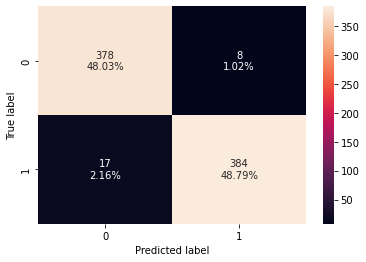

In [ ]:
##Stacked Model Confusion Matrix

cm_rf2 = confusion_matrix(y_train, stacked_preds_val)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_rf2.flatten().sum())]
            for item in cm_rf2.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf2, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")



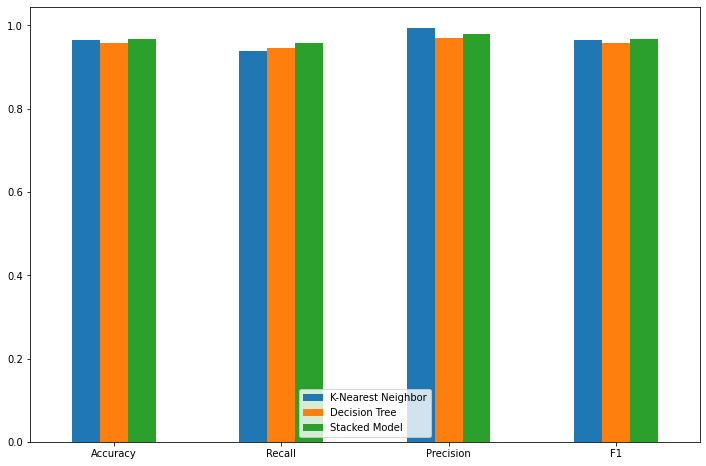

In [ ]:
ax = performance_models.plot.bar(rot=0, figsize=(12,8))

                                     fpr                             tpr  \
models                                                                     
KNN                      [0.0, 0.0, 1.0]  [0.0, 0.8461538461538461, 1.0]   
DT       [0.0, 0.02830188679245283, 1.0]  [0.0, 0.8901098901098901, 1.0]   
SM      [0.0, 0.009433962264150943, 1.0]  [0.0, 0.8791208791208791, 1.0]   

             auc  
models            
KNN     0.923077  
DT      0.930904  
SM      0.934843  


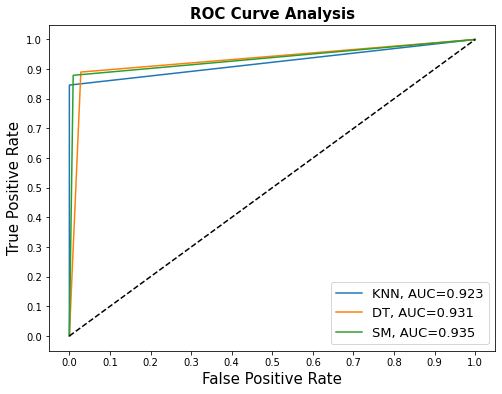

In [ ]:
##ROC Curve Analysis

knn_test_prediction = knn.predict(X_test)
dt_test_prediction = dt.predict(X_test)
stacking_test_prediction = stacked_model.predict(X_test)

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'KNN': knn_test_prediction, 'DT': dt_test_prediction, 'SM': stacking_test_prediction}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])

    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)

results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'],
             results_table.loc[i]['tpr'],
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

### 7. Test the final values on the test dataset. (5 Points)

In [ ]:
##FOR KNN
knnpred_val_test = knn.predict(X_test)
accuracyscore_test = accuracy_score(y_test, knnpred_val_test)
precisionscore_test = precision_score(y_test, knnpred_val_test)
recallscore_test = recall_score(y_test, knnpred_val_test)
f1score_test = f1_score(y_test, knnpred_val_test)
cm_rf_test = confusion_matrix(y_test, knnpred_val_test)

##FOR DECISION TREE
dtpred_val_test = dt.predict(X_test)
accuracyscore_dt_test = accuracy_score(y_test, dtpred_val_test)
precisionscore_dt_test = precision_score(y_test, dtpred_val_test)
recallscore_dt_test = recall_score(y_test, dtpred_val_test)
f1score_dt_test = f1_score(y_test, dtpred_val_test)
cm_rf_dt_test = confusion_matrix(y_test, dtpred_val_test)

##FOR STACKED MODEL
stacked_preds_val_test = stacked_model.predict(X_test)
accuracyscore_st_test = accuracy_score(y_test, stacked_preds_val_test)
precisionscore_st_test = precision_score(y_test, stacked_preds_val_test)
recallscore_st_test = recall_score(y_test, stacked_preds_val_test)
f1score_st_test = f1_score(y_test, stacked_preds_val_test)
cm_rf2_test = confusion_matrix(y_test, stacked_preds_val_test)


performance_knn_test = pd.DataFrame(
    {"Accuracy": accuracyscore_test, "Recall": recallscore_test, "Precision": precisionscore_test, "F1": f1score_test,},
    index=[0],
    )
performance_dt_test = pd.DataFrame(
    {"Accuracy": accuracyscore_dt_test, "Recall": recallscore_dt_test, "Precision": precisionscore_dt_test, "F1": f1score_dt_test,},
    index=[0],
    )
performance_st_test = pd.DataFrame(
    {"Accuracy": accuracyscore_st_test, "Recall": recallscore_st_test, "Precision": precisionscore_st_test, "F1": f1score_st_test,},
    index=[0],
    )

performance_models_test = pd.concat(
    [
        performance_knn_test.T,
        performance_dt_test.T,
        performance_st_test.T,
    ],
    axis=1,
)
performance_models_test.columns = [
    "K-Nearest Neighbor",
    "Decision Tree",
    "Stacked Model",
]
performance_models_test

,K-Nearest Neighbor,Decision Tree,Stacked Model
Accuracy,0.928934,0.934010,0.939086
Recall,0.846154,0.890110,0.879121
Precision,1.000000,0.964286,0.987654
F1,0.916667,0.925714,0.930233


Text(0.5, 15.0, 'Predicted label')

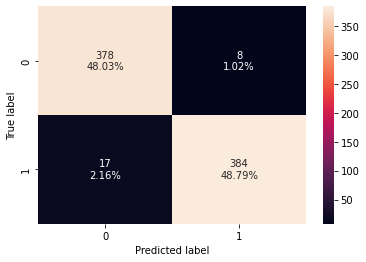

In [ ]:
##STACKED MODEL

cm_rf2_test = confusion_matrix(y_test, stacked_preds_val_test)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_rf2.flatten().sum())]
            for item in cm_rf2.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf2, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")



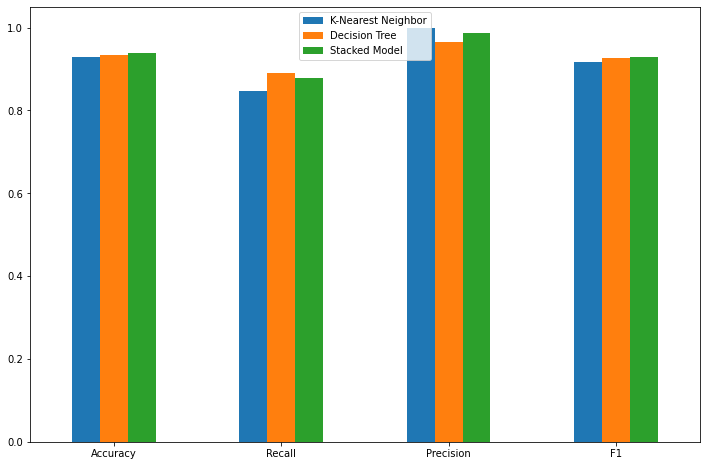

In [ ]:
ax = performance_models_test.plot.bar(rot=0, figsize=(12,8))

### 8. Export the Final Model using PICKLE Library. (5 Points)

In [ ]:
import pickle

filename =  'creditcarddset.pkl'
pickle.dump(stacked_model,open(filename, 'wb'))

## V.  FINAL DOCUMENTATION

#### Publishable Paper Article (50 Points)

Link: https://drive.google.com/file/d/1Ou9k-Zd00onEb9QWWBVEAq9bwy1Gry6g/view?usp=sharing

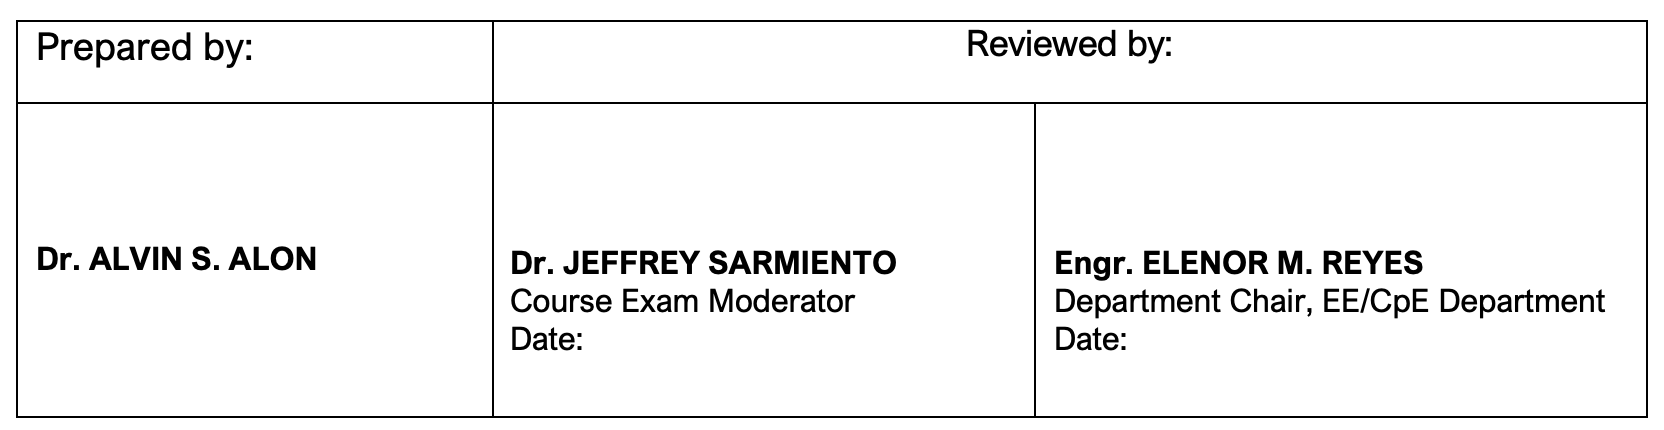